In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def read_postProcess_csv_data(postProcessDir,timeName):
    fileName=f"{timeName}.csv"
    filePath=os.path.join(postProcessDir,fileName)
    df=pd.read_csv(filePath)
    return df
    
def read_data_and_process(folder,timeName):
    df=read_postProcess_csv_data(folder,timeName)
    df["UNorm"]=np.sqrt(df['U_0']**2 + df['U_1']**2 + df['U_2']**2)
    MO2=0.032 #g/mol
    df["O2Conc"]=df['rho']*df['eps']*df['O2']/MO2
    MCO2=0.044 #g/mol
    df["CO2Conc"]=df['rho']*df['eps']*df['CO2']/MCO2
    return df

In [3]:
time_instant="4.51"
rawData_rpm="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T573_Pe1e-1_modifiedRPM/postProcess/rawdata"
df=read_data_and_process(rawData_rpm,time_instant)
fieldName="O2Conc"
dfpivot=df.pivot("y", "x", fieldName)
X=dfpivot.columns.values
Y=dfpivot.index.values
Z=dfpivot.values
Xi,Yi=np.meshgrid(X, Y)

In [39]:
dpi=300
title=""
label='O$_2$ mole concentration (mol/m$^3$)'
cmap='coolwarm'
levels=500


In [41]:
import matplotlib.pyplot as plt

from matplotlib import ticker

def tickformatter():
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1)) 
    return formatter



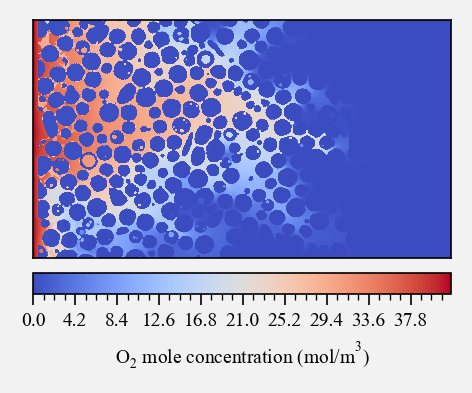

In [49]:
plt.rcParams.update({'font.size': 7,"font.family":"Times New Roman"})
# plt.rcParams["font.family"] = "Times New Roman"

figsize=(6/2.54,5/2.54)
fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()
ax.set_xlim(X.min(),X.max())
ax.set_ylim(Y.min(),Y.max())

ax.set_xticks([])
ax.set_yticks([])

CS=ax.contourf(Xi,Yi,Z, cmap=cmap, levels=levels)
cbar = fig.colorbar(CS,orientation='horizontal',label=label, pad=0.05)
fig.tight_layout()

fig.savefig("graphicAbsrtact2.jpg",dpi=300)

In [48]:
# fig.savefig("graphicAbsrtact2.jpg",bbox_inches='tight')
fig.savefig("graphicAbsrtact2.jpg",dpi=300)